In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Criando o DataFrame com os dados
df = pd.DataFrame({
    "Mes": [1,2,3,4,5,6,7,8,9,10,11,12],
    "Investimento": [500,700,200,1000,400,900,850,100,1200,500,450,1100],
    "Visitas": [3000,3500,1800,4000,2500,3800,3600,1500,4200,2800,2700,4100],
    "Preco": [50,50,48,52,47,51,49,46,53,48,47,52],
    "Concorrentes": [3,2,5,2,4,2,3,6,2,4,4,3],
    "Vendas": [55,65,30,100,40,95,85,20,120,55,48,130]
})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Mes           12 non-null     int64
 1   Investimento  12 non-null     int64
 2   Visitas       12 non-null     int64
 3   Preco         12 non-null     int64
 4   Concorrentes  12 non-null     int64
 5   Vendas        12 non-null     int64
dtypes: int64(6)
memory usage: 708.0 bytes


In [49]:
df.corr(numeric_only=True)

,Mes,Investimento,Visitas,Preco,Concorrentes,Vendas
Mes,1.000000,0.231005,0.136856,-0.027711,0.174197,0.312056
Investimento,0.231005,1.000000,0.980179,0.913519,-0.862337,0.982825
Visitas,0.136856,0.980179,1.000000,0.897897,-0.929404,0.946833
Preco,-0.027711,0.913519,0.897897,1.000000,-0.848797,0.911146
Concorrentes,0.174197,-0.862337,-0.929404,-0.848797,1.000000,-0.783936
Vendas,0.312056,0.982825,0.946833,0.911146,-0.783936,1.000000


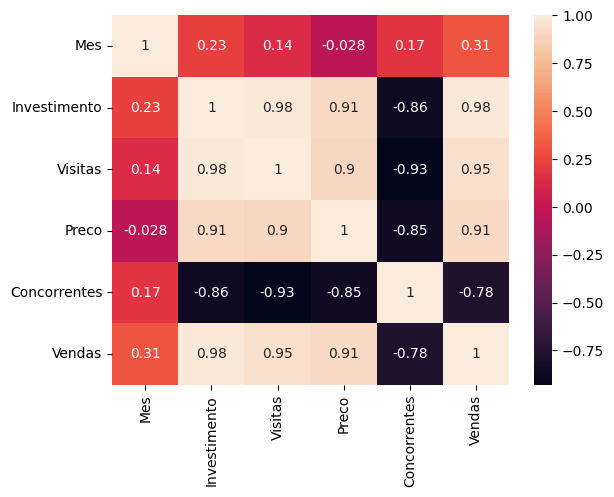

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [50]:
df.head()

,Mes,Investimento,Visitas,Preco,Concorrentes,Vendas
0,1,500,3000,50,3,55
1,2,700,3500,50,2,65
2,3,200,1800,48,5,30
3,4,1000,4000,52,2,100
4,5,400,2500,47,4,40


In [51]:
df.describe().round()

,Mes,Investimento,Visitas,Preco,Concorrentes,Vendas
count,12.0,12.0,12.0,12.0,12.0,12.0
mean,6.0,658.0,3125.0,49.0,3.0,70.0
std,4.0,355.0,894.0,2.0,1.0,35.0
min,1.0,100.0,1500.0,46.0,2.0,20.0
25%,4.0,438.0,2650.0,48.0,2.0,46.0
50%,6.0,600.0,3250.0,50.0,3.0,60.0
75%,9.0,925.0,3850.0,51.0,4.0,96.0
max,12.0,1200.0,4200.0,53.0,6.0,130.0


Preparar dados para predição

In [65]:
preditoras = ["Investimento",  "Concorrentes"]
X = df[preditoras]
y = df["Vendas"]


Separar dados de treino de teste

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


In [76]:
X_train

,Investimento,Concorrentes
0,500,3
8,1200,2
5,900,2
2,200,5
1,700,2
11,1100,3
4,400,4
7,100,6
3,1000,2
6,850,3


Treinar modelo

In [77]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [85]:
pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": modelo.coef_
})


,Variável,Coeficiente
0,Investimento,0.119196
1,Concorrentes,6.790358


In [78]:
y_test

,Vendas
10,48
9,55


In [79]:
pred = modelo.predict(X_test)
print(pred)


[50.22934668 56.18913026]


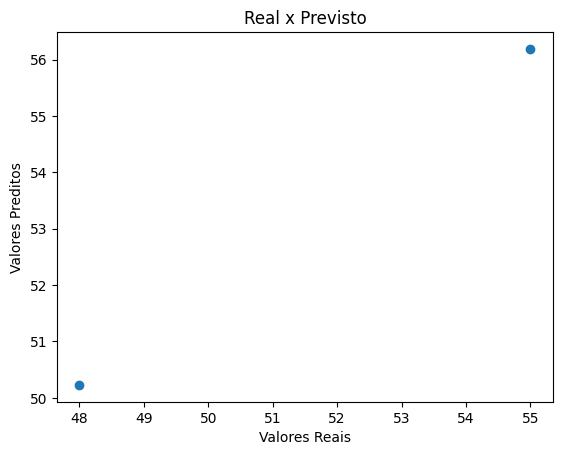

In [84]:
plt.scatter(y_test, pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Real x Previsto")
plt.show()


In [87]:
novo = [[1500, 50]]  # investimento,concorrentes
modelo.predict(novo)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([487.74125818])